In [5]:
import pandas as pd
import numpy as np

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

In [8]:
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(307511, 122)

In [10]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
data_columns = df.columns.tolist()

columns = []

with open('column_names.txt', 'w') as f:
    for column in data_columns:
        values = f'{column}: {df[column].isnull().sum()}: {df[column].dtype}'
        columns.append(values)

In [13]:
correlation = []

with open('column_names.txt', 'w') as f:
    for column in data_columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            correlation.append(f"{column}: {df[column].corr(df['TARGET'])}")

In [14]:
correlation

['SK_ID_CURR: -0.0021084690181977206',
 'TARGET: 1.0',
 'CNT_CHILDREN: 0.019187133596270115',
 'AMT_INCOME_TOTAL: -0.003981865601205655',
 'AMT_CREDIT: -0.030369286461429758',
 'AMT_ANNUITY: -0.012816561515413587',
 'AMT_GOODS_PRICE: -0.03964528116954427',
 'REGION_POPULATION_RELATIVE: -0.03722714854244529',
 'DAYS_BIRTH: 0.07823930830982709',
 'DAYS_EMPLOYED: -0.04493166265773868',
 'DAYS_REGISTRATION: 0.041974862831417235',
 'DAYS_ID_PUBLISH: 0.05145717260705741',
 'OWN_CAR_AGE: 0.0376115642751656',
 'FLAG_MOBIL: 0.0005343955790281198',
 'FLAG_EMP_PHONE: 0.045982219716592804',
 'FLAG_WORK_PHONE: 0.028524322363217308',
 'FLAG_CONT_MOBILE: 0.00037012680234897825',
 'FLAG_PHONE: -0.023806272330357335',
 'FLAG_EMAIL: -0.001758383431254637',
 'CNT_FAM_MEMBERS: 0.009307784396531136',
 'REGION_RATING_CLIENT: 0.05889901494571265',
 'REGION_RATING_CLIENT_W_CITY: 0.06089266756482348',
 'HOUR_APPR_PROCESS_START: -0.02416583143009439',
 'REG_REGION_NOT_LIVE_REGION: 0.0055759445209083635',
 'REG_

In [15]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)

<Axes: xlabel='TARGET'>

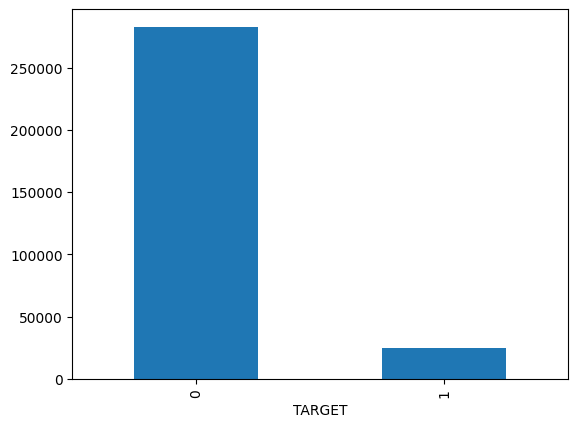

In [16]:
df['TARGET'].value_counts().plot(kind='bar')
#Our Data, as we have expected is definitely skewed!

In [17]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE'>

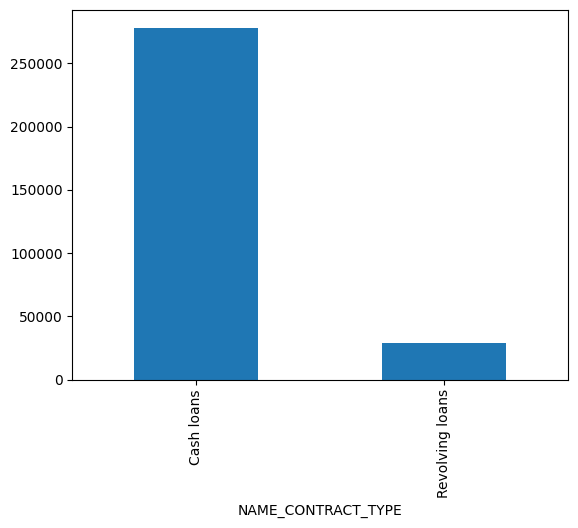

In [18]:
df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')

c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

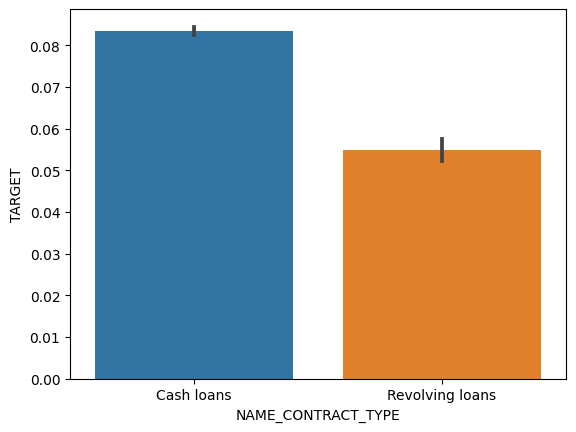

In [19]:
sns.barplot(x=df['NAME_CONTRACT_TYPE'], y=df['TARGET'])

<Axes: xlabel='CODE_GENDER'>

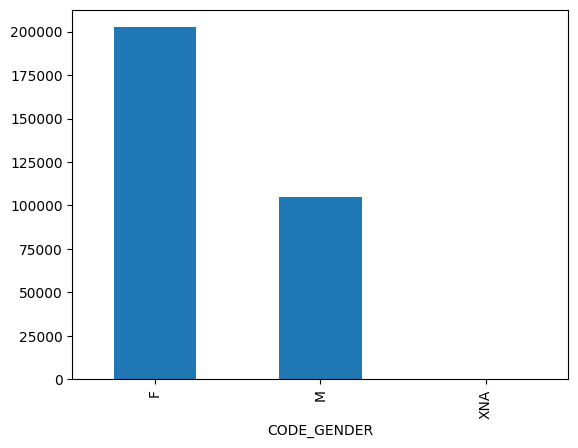

In [20]:
df['CODE_GENDER'].value_counts().plot(kind='bar')

c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='CODE_GENDER', ylabel='TARGET'>

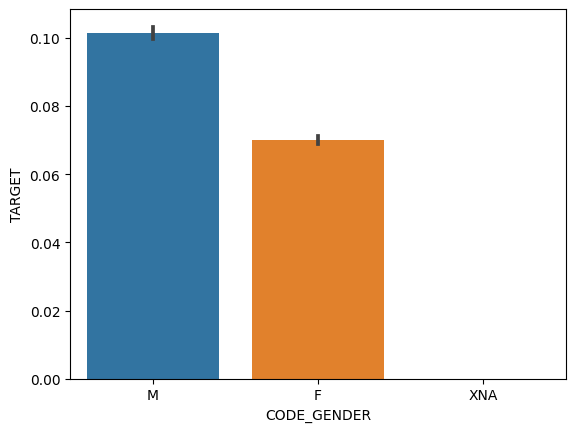

In [21]:
sns.barplot(x=df['CODE_GENDER'], y=df['TARGET'])

<Axes: xlabel='FLAG_OWN_CAR'>

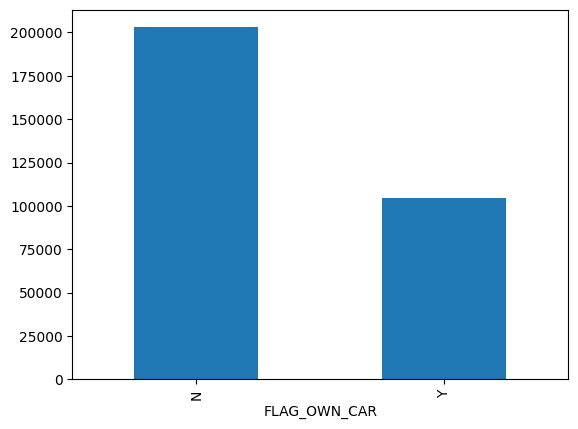

In [22]:
df['FLAG_OWN_CAR'].value_counts().plot(kind='bar')

c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='FLAG_OWN_CAR', ylabel='TARGET'>

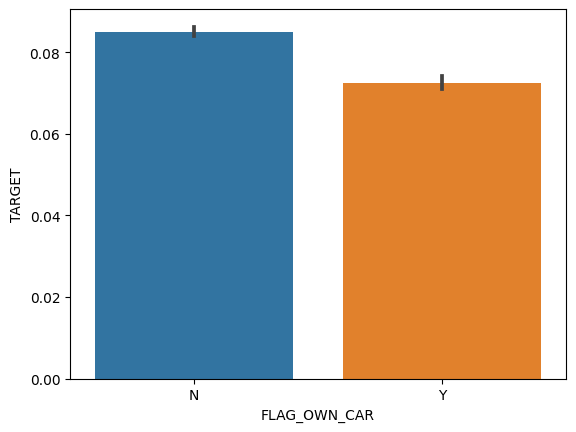

In [23]:
sns.barplot(x=df['FLAG_OWN_CAR'], y=df['TARGET'])

<Axes: xlabel='FLAG_OWN_REALTY'>

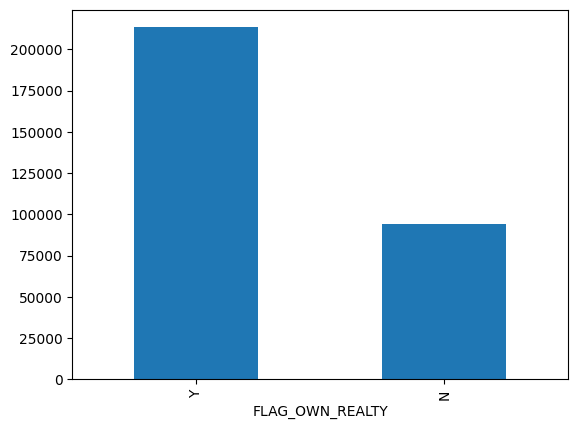

In [24]:
df['FLAG_OWN_REALTY'].value_counts().plot(kind='bar')

c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='FLAG_OWN_REALTY', ylabel='TARGET'>

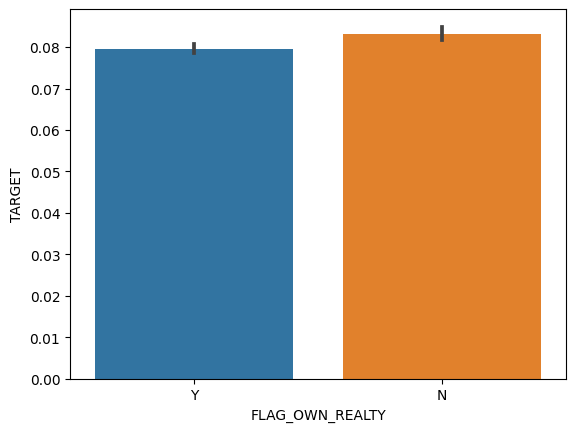

In [25]:
sns.barplot(x=df['FLAG_OWN_REALTY'], y=df['TARGET'])

c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='AMT_INCOME_TOTAL'>

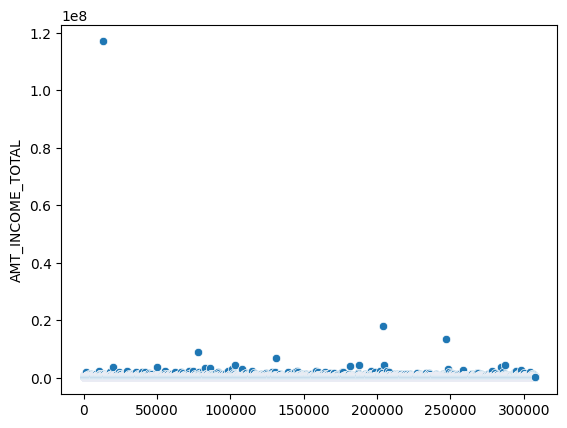

In [26]:
sns.scatterplot(df['AMT_INCOME_TOTAL'])

c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='AMT_CREDIT'>

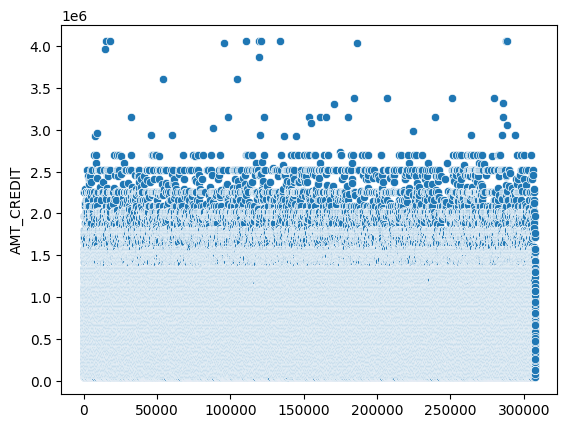

In [27]:
sns.scatterplot(df['AMT_CREDIT'])

In [28]:
# The Columns which we are going to use for further discussion -:

# TARGET
# NAME_CONTRACT_TYPE
# CODE_GENDER
# FLAG_OWN_CAR
# AMT_INCOME_TOTAL
# AMT_CREDIT
# NAME_EDUCATION_TYPE
# OCCUPATION_TYPE
# CNT_FAM_MEMBERS
# REGION_RATING_CLIENT
# REG_REGION_NOT_WORK_REGION
# DAYS_LAST_PHONE_CHANGE

data = df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 
             'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 
             'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'DAYS_LAST_PHONE_CHANGE']]

In [29]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,202500.0,406597.5,Secondary / secondary special,Laborers,1.0,2,0,-1134.0
1,0,Cash loans,F,N,270000.0,1293502.5,Higher education,Core staff,2.0,1,0,-828.0
2,0,Revolving loans,M,Y,67500.0,135000.0,Secondary / secondary special,Laborers,1.0,2,0,-815.0
3,0,Cash loans,F,N,135000.0,312682.5,Secondary / secondary special,Laborers,2.0,2,0,-617.0
4,0,Cash loans,M,N,121500.0,513000.0,Secondary / secondary special,Core staff,1.0,2,0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,157500.0,254700.0,Secondary / secondary special,Sales staff,1.0,1,0,-273.0
307507,0,Cash loans,F,N,72000.0,269550.0,Secondary / secondary special,NaN,1.0,2,0,0.0
307508,0,Cash loans,F,N,153000.0,677664.0,Higher education,Managers,1.0,3,0,-1909.0
307509,1,Cash loans,F,N,171000.0,370107.0,Secondary / secondary special,Laborers,2.0,2,0,-322.0


In [50]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [30]:
data.isnull().sum()


TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
NAME_EDUCATION_TYPE               0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REG_REGION_NOT_WORK_REGION        0
DAYS_LAST_PHONE_CHANGE            1
dtype: int64

In [31]:
data.dropna(inplace=True)

C:\Users\Ganesh Mahadev\AppData\Local\Temp\ipykernel_22936\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211118 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      211118 non-null  int64  
 1   NAME_CONTRACT_TYPE          211118 non-null  object 
 2   CODE_GENDER                 211118 non-null  object 
 3   FLAG_OWN_CAR                211118 non-null  object 
 4   AMT_INCOME_TOTAL            211118 non-null  float64
 5   AMT_CREDIT                  211118 non-null  float64
 6   NAME_EDUCATION_TYPE         211118 non-null  object 
 7   OCCUPATION_TYPE             211118 non-null  object 
 8   CNT_FAM_MEMBERS             211118 non-null  float64
 9   REGION_RATING_CLIENT        211118 non-null  int64  
 10  REG_REGION_NOT_WORK_REGION  211118 non-null  int64  
 11  DAYS_LAST_PHONE_CHANGE      211118 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 20.9+ MB


<Axes: >

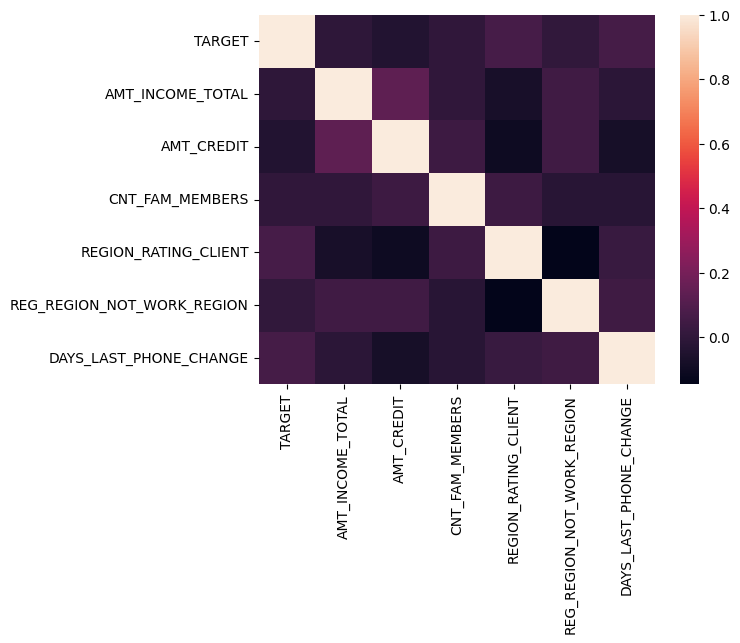

In [33]:
numerical_columns = data.select_dtypes(include='number').columns
sns.heatmap(data[numerical_columns].corr())

In [34]:
data[numerical_columns].corr()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
TARGET,1.000000,-0.005366,-0.040779,-0.001873,0.063884,0.002482,0.061376
AMT_INCOME_TOTAL,-0.005366,1.000000,0.134229,-0.000115,-0.074202,0.050190,-0.013758
AMT_CREDIT,-0.040779,0.134229,1.000000,0.037062,-0.102790,0.047761,-0.076811
CNT_FAM_MEMBERS,-0.001873,-0.000115,0.037062,1.000000,0.039445,-0.023004,-0.023817
REGION_RATING_CLIENT,0.063884,-0.074202,-0.102790,0.039445,1.000000,-0.146637,0.026810
REG_REGION_NOT_WORK_REGION,0.002482,0.050190,0.047761,-0.023004,-0.146637,1.000000,0.042506
DAYS_LAST_PHONE_CHANGE,0.061376,-0.013758,-0.076811,-0.023817,0.026810,0.042506,1.000000


In [35]:
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [38]:
categorical_ohe = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR']

categorical_ohe_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [39]:
categorical_oe = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

categorical_oe_transformer = Pipeline(steps=[
    ('ohe', OrdinalEncoder())
])

In [40]:
numerical = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE']

numerical_ss = Pipeline(steps=[
    ('ss', StandardScaler())
])

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_ohe_transformer', categorical_ohe_transformer, categorical_ohe),
        ('categorical_oe_transformer', categorical_oe_transformer, categorical_oe),
        ('numerical_ss', numerical_ss, numerical)
])

In [42]:
preprocessor

ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR']),
                                ('categorical_oe_transformer',
                                 Pipeline(steps=[('ohe', OrdinalEncoder())]),
                                 ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']),
                                ('numerical_ss',
                                 Pipeline(steps=[('ss', StandardScaler())]),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'DAYS_LAST_PHONE_CHANGE'])])

In [43]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [44]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_ss',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('classifier', LogisticRegression())])

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))

Accuracy score for training data is  0.912157921536585
Accuracy score for test data is  0.9121352785145889
Recall score of our Model is  0.0
Precision Score of our Model is  0.0


c:\Users\Ganesh Mahadev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
import pickle as pkl

with open("df.pkl", 'wb') as file:
    pkl.dump(data, file)

with open("pipeline.pkl", 'wb') as file:
    pkl.dump(pipeline, file)